In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
datas = pd.read_csv("Pélec_12_notebook.csv")
datas.head()

,OSEBuildingID,PrimaryPropertyType,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuildings,ENERGYSTARScore,SiteEUIkBtusf,SiteEUIWNkBtusf,SourceEUIkBtusf,SourceEUIWNkBtusf,SiteEnergyUsekBtu,SiteEnergyUseWNkBtu,SteamUsekBtu,ElectricitykWh,ElectricitykBtu,NaturalGastherms,NaturalGaskBtu,OtherFuelUsekBtu,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,SiteEUIkBtusf_diff1516,SiteEUIWNkBtusf_diff1516,SourceEUIkBtusf_diff1516,SourceEUIWNkBtusf_diff1516,SiteEnergyUsekBtu_diff1516,SiteEnergyUseWNkBtu_diff1516,SteamUsekBtu_diff1516,ElectricitykWh_diff1516,ElectricitykBtu_diff1516,NaturalGastherms_diff1516,NaturalGaskBtu_diff1516,TotalGHGEmissions_diff1516,GHGEmissionsIntensity_diff1516
0,1,hotel,7.0,1927.0,1.0,12.0,88434.0,0.0,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,NaN,249.43,2.64,2.799997,4.000003,9.0,13.9,244934.5,475482.0,0.0,76207.2500,259867.0,40.52930,4065.0,0.55,0.19
1,2,hotel,7.0,1996.0,1.0,11.0,103566.0,15064.0,88502.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,NaN,263.51,2.38,0.400003,0.000000,0.0,0.0,33698.0,310244.0,0.0,-194137.8125,0.0,6960.81641,696097.0,32.35,0.48
2,3,hotel,7.0,1969.0,1.0,41.0,961990.0,0.0,961990.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,NaN,2061.48,1.92,0.000000,0.000000,0.0,0.0,0.0,806456.0,1906150.0,-68495.0000,0.0,-22161.00000,0.0,27.80,0.27
3,5,hotel,7.0,1926.0,1.0,10.0,61320.0,0.0,61320.0,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,high outlier,1936.34,31.38,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.3125,0.0,-1906.86914,0.0,0.00,0.00
4,8,hotel,7.0,1980.0,1.0,18.0,119890.0,12460.0,107430.0,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,NaN,507.70,4.02,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-204392.3750,0.0,408.98438,40893.0,0.00,0.00


Classement des variables

In [2]:
nom_features = ["PrimaryPropertyType", "CouncilDistrictCode", "Outlier" 
    ]
ord_features = ["YearBuilt", "NumberofFloors", "NumberofBuildings", 
    ]
num_features = ["PropertyGFATotal", "PropertyGFABuildings", "PropertyGFAParking", 
    ]
num_features_a_diss = ["SteamUsekBtu_diff1516", "ElectricitykBtu_diff1516", "NaturalGaskBtu_diff1516",

    "SteamUsekBtu", "ElectricitykBtu", "NaturalGaskBtu", "OtherFuelUsekBtu", 
    ]
a_exclure = ["SiteEUIkBtusf", "SiteEUIWNkBtusf", "SourceEUIkBtusf", "SourceEUIWNkBtusf", "GHGEmissionsIntensity", 
    "SiteEnergyUsekBtu", "SiteEnergyUseWNkBtu", 
    
    "TotalGHGEmissions_diff1516", "GHGEmissionsIntensity_diff1516", "SiteEnergyUsekBtu_diff1516", "SiteEnergyUseWNkBtu_diff1516", 
    "SiteEUIkBtusf_diff1516", "SiteEUIWNkBtusf_diff1516", "SourceEUIkBtusf_diff1516", "SourceEUIWNkBtusf_diff1516", 
    ]
cible = ["TotalGHGEmissions"]

In [3]:
def convert_nan(data, cols=None):
    if type(data) == pd.DataFrame:
        if cols is None:
            cols = data.columns
        for col in cols:
            if data[col].dtypes == np.object_:
                data.loc[(data[col].isnull()) | (data[col] == np.inf) | (data[col] == -np.inf), col] = "nan"
            else:
                if data[col].dtypes == np.int64:
                    data[col] = data[col].astype(np.float64)
                data.loc[(data[col].isnull()) | (data[col] < 0), col] = 0
                data[col].replace([-np.inf], 0, inplace=True)
                maxi = data.loc[data[col] != np.inf, col].max()
                data[col].replace([np.inf], maxi, inplace=True)

    else:
        if data.dtypes == np.object_:
            data.replace(np.nan, "nan", inplace=True)
        else:
            data.replace([np.nan, -np.inf], 0, inplace=True)
            maxi = data[data != np.inf].max()
            data.replace([np.inf], data.max(), inplace=True)

    return data

In [4]:
def histogr(datas, cols):
    nb_classes = round(1 + np.log2(len(datas))) * 2

    plt_cols_full = len(cols) // 3
    if len(cols) % 3 != 0:
        plt_col_suppl = 1
    else:
        plt_col_suppl = 0
    plt_cols = plt_cols_full + plt_col_suppl

    fig = plt.figure(figsize=(15, 5 * plt_cols))
    for num, col in enumerate(cols):
        ax = fig.add_subplot(plt_cols, 3, num+1)
        skew = round(datas[col].skew(), 3)
        kurt = round(datas[col].kurtosis(), 3)
        ax.hist(datas[col], bins=nb_classes, label= f"Skewness: {skew}\nKurtosis: {kurt}")
        ax.set_title(col, fontsize=14)
        ax.legend()

In [5]:
n_datas = datas.copy()

cat_features = nom_features + ord_features

n_datas = convert_nan(n_datas, cat_features)
n_datas = convert_nan(n_datas, num_features)
n_datas = convert_nan(n_datas, num_features_a_diss)
n_datas = convert_nan(n_datas, a_exclure)
n_datas = convert_nan(n_datas, cible)


## Outliers

Comme vu précédemment, il semble y avoir des outliers sur la variables "SiteEnergyUsekBtu". Les valeurs de cette dernière semblent être comprises entre -4 et 4 une fois normalisées par la classe QuantileTransformer de sklearn.

### Pour rappel, la limite des outliers à été fixée à 3 écart-types

Nous allons retirer ces outliers


In [6]:
from sklearn.preprocessing import QuantileTransformer

n_datas["transf"] = QuantileTransformer(output_distribution= "normal").fit_transform(n_datas[cible])
n_datas = n_datas[(n_datas["transf"] > -3) & (n_datas["transf"] < 3)].reset_index(drop= True)


## Création de nouvelles variables

In [7]:
new_datas = pd.DataFrame()

new_datas["GFAperFloor"] = n_datas["PropertyGFABuildings"] / n_datas["NumberofFloors"]
new_datas["GFAperBuilding"] = n_datas["PropertyGFABuildings"] / n_datas["NumberofBuildings"]
new_datas["HasParking"] = n_datas["PropertyGFAParking"].mask(n_datas["PropertyGFAParking"] != 0, 1)
new_datas["percGFABuilding"] = n_datas["PropertyGFABuildings"] / n_datas["PropertyGFATotal"]
new_datas["percGFAParking"] = n_datas["PropertyGFAParking"] / n_datas["PropertyGFATotal"]

new_datas = convert_nan(new_datas, new_datas.columns)

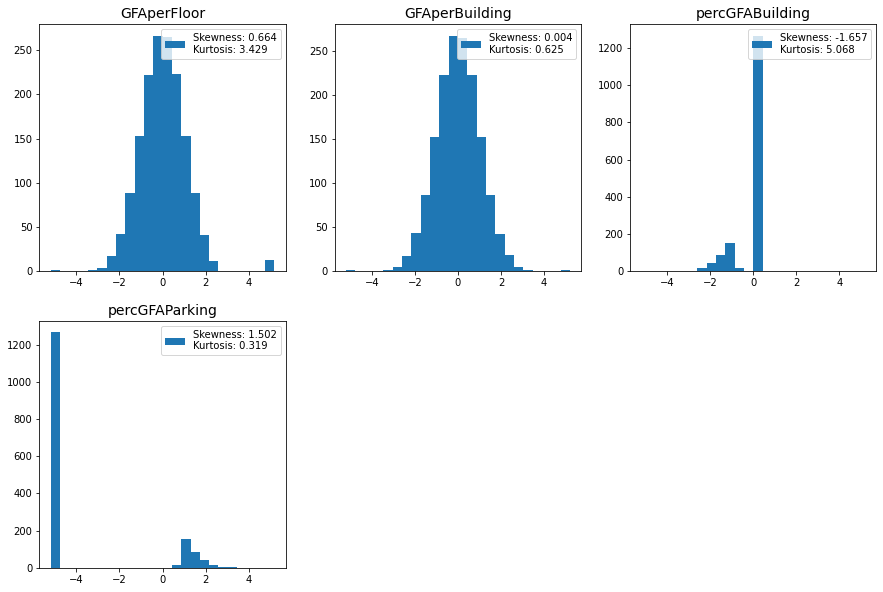

In [8]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["GFAperFloor", "GFAperBuilding", "percGFABuilding", "percGFAParking"]
    ]), columns=[
    "GFAperFloor", "GFAperBuilding", "percGFABuilding", "percGFAParking"
    ])

histogr(tmp_datas, tmp_datas.columns)

"GFAperFloor" et "GFAperBuilding" semblent présenter des outliers en dessous de -4 et au dessus de 4. Ce sera des valeurs à retirer.

Ce processus d'analyse sera suivi à chaque création de nouvelle variable.


In [13]:
new_datas["SteamperGFA"] = n_datas["SteamUsekBtu"] / n_datas["PropertyGFATotal"]
new_datas["ElecperGFA"] = n_datas["ElectricitykBtu"] / n_datas["PropertyGFATotal"]
new_datas["GasperGFA"] = n_datas["NaturalGaskBtu"] / n_datas["PropertyGFATotal"]
new_datas["FuelperGFA"] = n_datas["OtherFuelUsekBtu"] / n_datas["PropertyGFATotal"]

new_datas["percSteam"] = n_datas["SteamUsekBtu"] / n_datas["SiteEnergyUsekBtu"]
new_datas["percElec"] = n_datas["ElectricitykBtu"] / n_datas["SiteEnergyUsekBtu"]
new_datas["percGas"] = n_datas["NaturalGaskBtu"] / n_datas["SiteEnergyUsekBtu"]
new_datas["percFuel"] = n_datas["OtherFuelUsekBtu"] / n_datas["SiteEnergyUsekBtu"]

new_datas = convert_nan(new_datas, new_datas.columns)

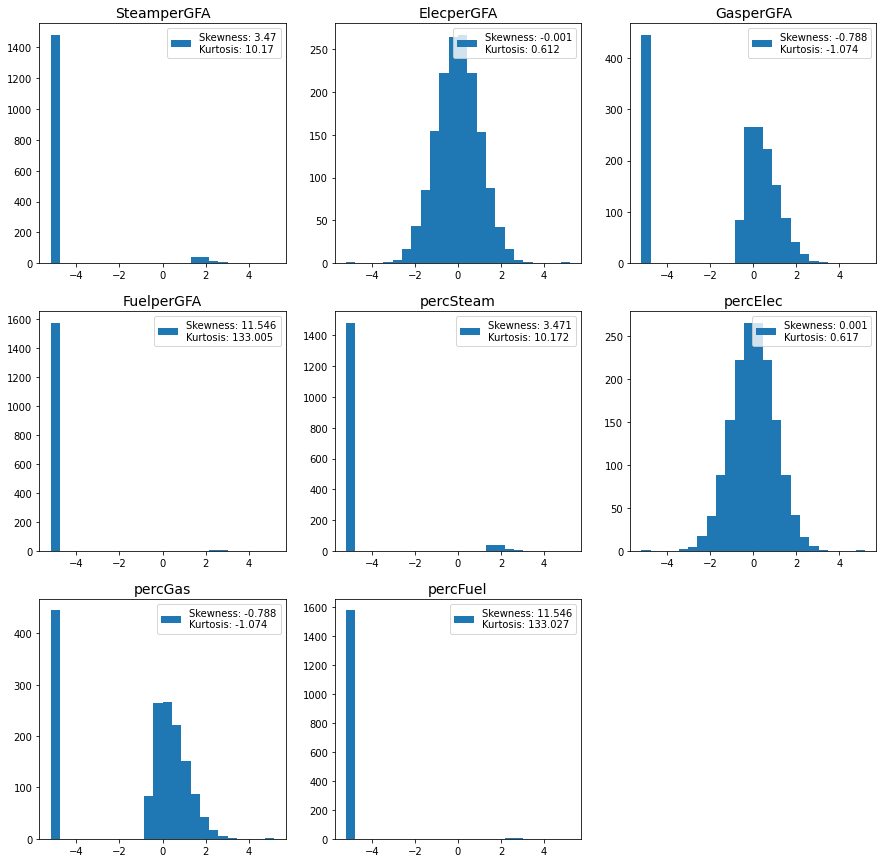

In [14]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["SteamperGFA", "ElecperGFA", "GasperGFA", "FuelperGFA", "percSteam", "percElec", "percGas", "percFuel"]
    ]), columns=[
    "SteamperGFA", "ElecperGFA", "GasperGFA", "FuelperGFA", "percSteam", "percElec", "percGas", "percFuel"
    ])

histogr(tmp_datas, tmp_datas.columns)

On constate que les features liées à Steam et Fuel ont énormément de outliers, elles ne seront probablement pas gardées pour la prédiction

Les features liées à Gas ont une assez bonne distribution mais la quantité de outliers est un peu élevée

Quant à Electricity, très bonne distribution avec peu de outliers

### Variables normailsées sur le temps des 30 dernières années

In [17]:
new_datas["WNfactor"] = n_datas["SiteEnergyUsekBtu"] / n_datas["SiteEnergyUseWNkBtu"]

new_datas = convert_nan(new_datas, new_datas.columns)

In [18]:
new_datas["SteamWN"] = n_datas["SteamUsekBtu"] / new_datas["WNfactor"]
new_datas["ElecWN"] = n_datas["ElectricitykBtu"] / new_datas["WNfactor"]
new_datas["GasWN"] = n_datas["NaturalGaskBtu"] / new_datas["WNfactor"]
new_datas["FuelWN"] = n_datas["OtherFuelUsekBtu"] / new_datas["WNfactor"]

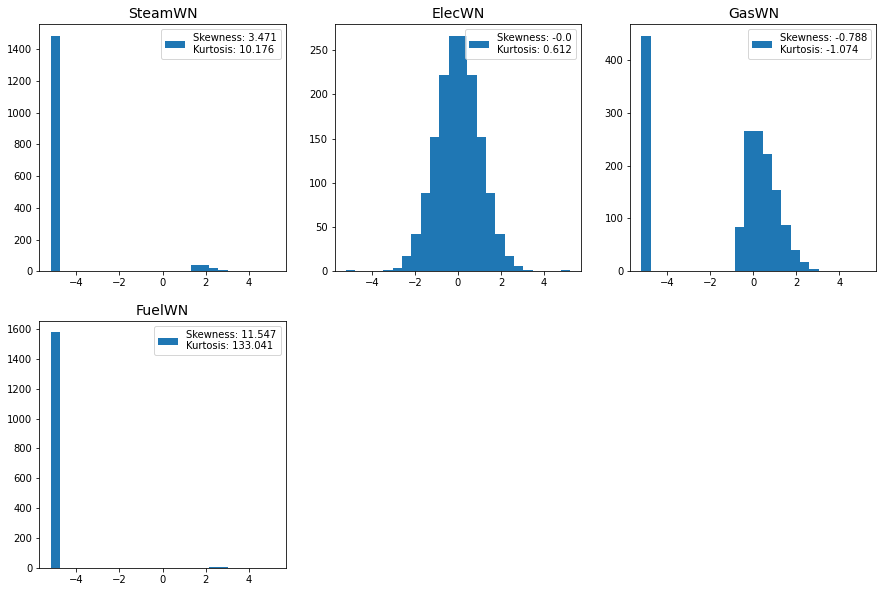

In [19]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["SteamWN", "ElecWN", "GasWN", "FuelWN"]
    ]), columns=[
    "SteamWN", "ElecWN", "GasWN", "FuelWN"
    ])

histogr(tmp_datas, tmp_datas.columns)

Comme on pouvait s'y attendre, les observations sur ces variables sont les mêmes que précédemment

In [20]:
new_datas["SteamWNperGFA"] = new_datas["SteamWN"] / n_datas["PropertyGFATotal"]
new_datas["ElecWNperGFA"] = new_datas["ElecWN"] / n_datas["PropertyGFATotal"]
new_datas["GasWNperGFA"] = new_datas["GasWN"] / n_datas["PropertyGFATotal"]
new_datas["FuelWNperGFA"] = new_datas["FuelWN"] / n_datas["PropertyGFATotal"]

new_datas = convert_nan(new_datas, new_datas.columns)


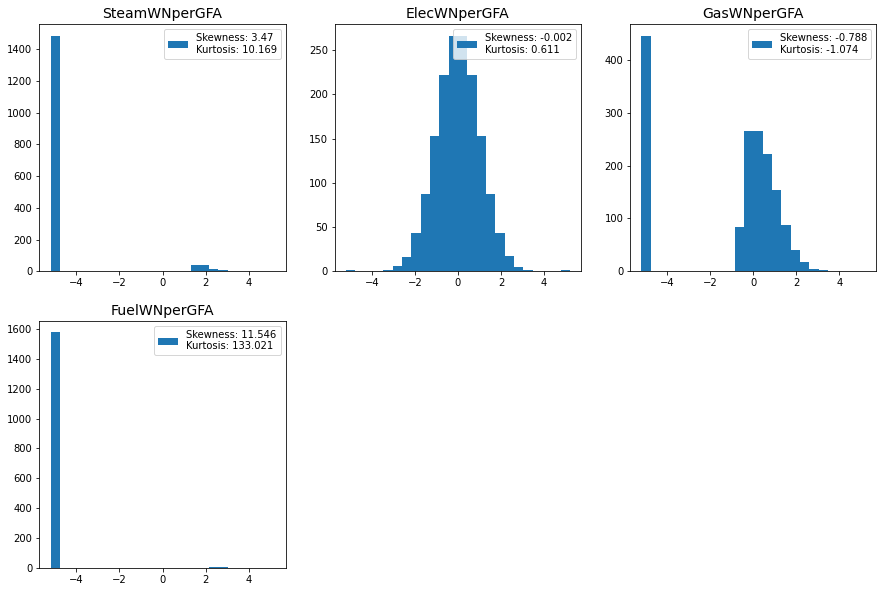

In [21]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["SteamWNperGFA", "ElecWNperGFA", "GasWNperGFA", "FuelWNperGFA"]
    ]), columns=[
    "SteamWNperGFA", "ElecWNperGFA", "GasWNperGFA", "FuelWNperGFA"
    ])

histogr(tmp_datas, tmp_datas.columns)

Mêmes observations

In [22]:
new_datas["percSteamWN"] = new_datas["SteamWN"] / n_datas["SiteEnergyUseWNkBtu"]
new_datas["percElecWN"] = new_datas["ElecWN"] / n_datas["SiteEnergyUseWNkBtu"]
new_datas["percGasWN"] = new_datas["GasWN"] / n_datas["SiteEnergyUseWNkBtu"]
new_datas["percFuelWN"] = new_datas["FuelWN"] / n_datas["SiteEnergyUseWNkBtu"]

new_datas = convert_nan(new_datas, new_datas.columns)

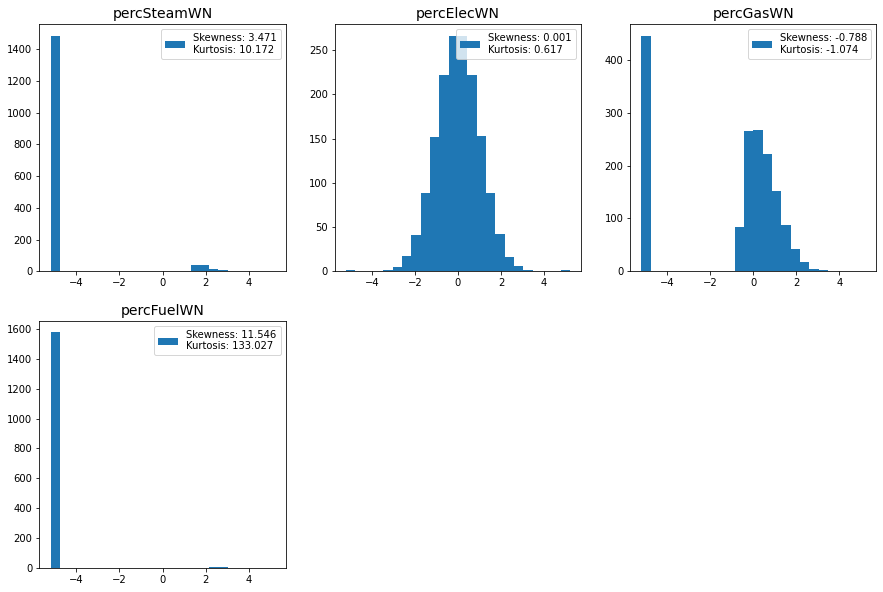

In [23]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["percSteamWN", "percElecWN", "percGasWN", "percFuelWN"]
    ]), columns=[
    "percSteamWN", "percElecWN", "percGasWN", "percFuelWN"
    ])

histogr(tmp_datas, tmp_datas.columns)

Mêmes observations

In [24]:
new_datas["WNfactor_diff"] = n_datas["SiteEnergyUsekBtu_diff1516"] / n_datas["SiteEnergyUseWNkBtu_diff1516"]

new_datas = convert_nan(new_datas, new_datas.columns)

In [25]:
new_datas["Steam_diff1516WN"] = n_datas["SteamUsekBtu_diff1516"] / new_datas["WNfactor_diff"]
new_datas["Elec_diff1516WN"] = n_datas["ElectricitykBtu_diff1516"] / new_datas["WNfactor_diff"]
new_datas["Gas_diff1516WN"] = n_datas["NaturalGaskBtu_diff1516"] / new_datas["WNfactor_diff"]

new_datas = convert_nan(new_datas, new_datas.columns)

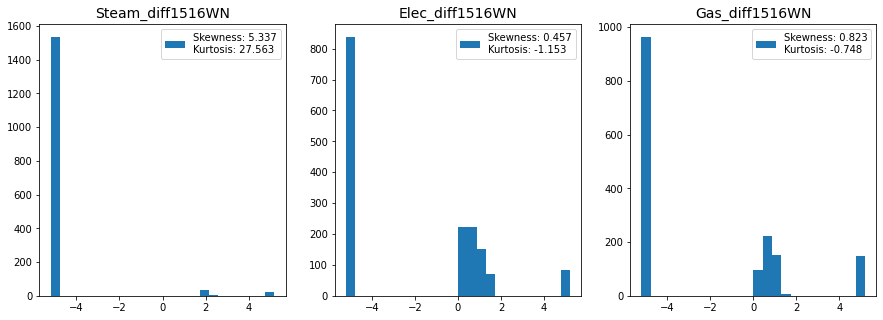

In [26]:
tmp_datas = pd.DataFrame(QuantileTransformer(output_distribution= "normal").fit_transform(new_datas[
    ["Steam_diff1516WN", "Elec_diff1516WN", "Gas_diff1516WN"]
    ]), columns=[
    "Steam_diff1516WN", "Elec_diff1516WN", "Gas_diff1516WN"
    ])

histogr(tmp_datas, tmp_datas.columns)

Les trois distributions contiennent énormément de outliers. Ces variables ne seront peut-être pas utilisées pour la prédiction

<AxesSubplot:>

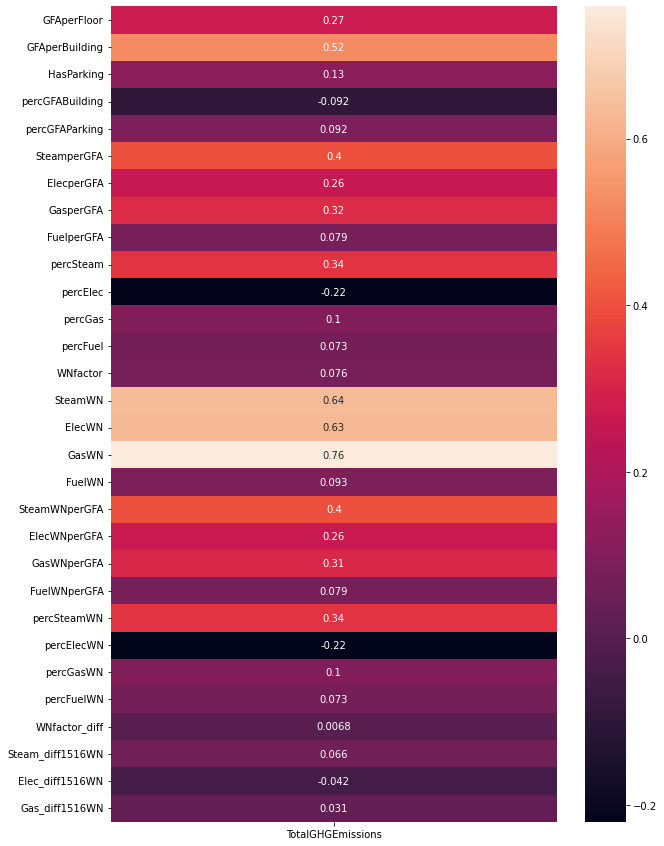

In [31]:
import seaborn as sns

tmp_num = new_datas.copy()

tmp_num[cible] = n_datas[cible]

corr_num = tmp_num.corr().filter(cible).drop(cible)

fig = plt.figure(figsize=(10,15))
sns.heatmap(corr_num, annot=True)

Il y a de nombreuses variables qui peuvent être considérées comme des doublons (référence à la même observation, même unité de mesure) à cela prêt que l'une est une valeur "brute" alors que l'autre est une valeur 'aplanie" sur les observations des 30 dernières années. Je pense garder ces dernières pour la prédiction

In [32]:
f_datas = n_datas.merge(new_datas, how= "outer", left_index=True, right_index=True)
f_datas = f_datas.drop(columns="transf")

f_datas = convert_nan(f_datas, f_datas.columns)

In [33]:
f_datas.to_csv("Pélec_14_gaz_train.csv", index=False)